In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 6, 100)
y_true = np.sin(X)  # true function
noise = np.random.normal(0, 0.2, size=X.shape)
y = y_true + noise

# Reshape for sklearn
X = X.reshape(-1, 1)




In [3]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

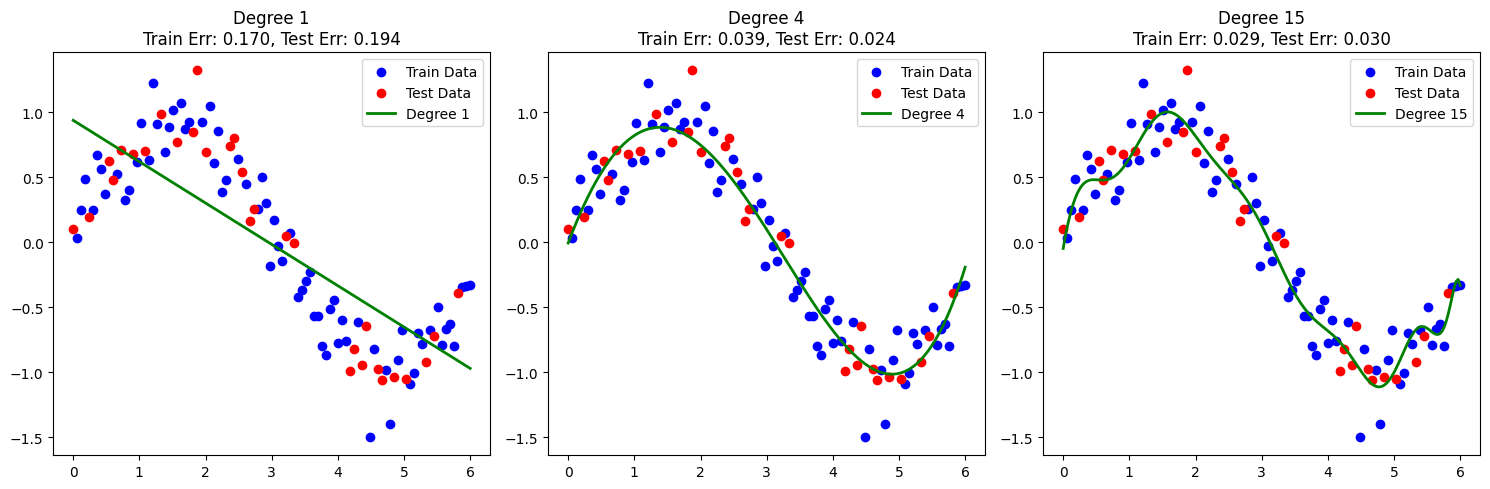

In [5]:
# Step 3: Try different polynomial degrees
degrees = [1, 4, 15]  # underfit, good fit, overfit

plt.figure(figsize=(15, 5))

for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label="Train Data")
    plt.scatter(X_test, y_test, color='red', label="Test Data")

    X_curve = np.linspace(0, 6, 200).reshape(-1, 1)
    y_curve = model.predict(poly.transform(X_curve))
    plt.plot(X_curve, y_curve, color='green', linewidth=2, label=f"Degree {d}")

    plt.title(f"Degree {d}\nTrain Err: {train_error:.3f}, Test Err: {test_error:.3f}")
    plt.legend()

plt.tight_layout()
plt.show()



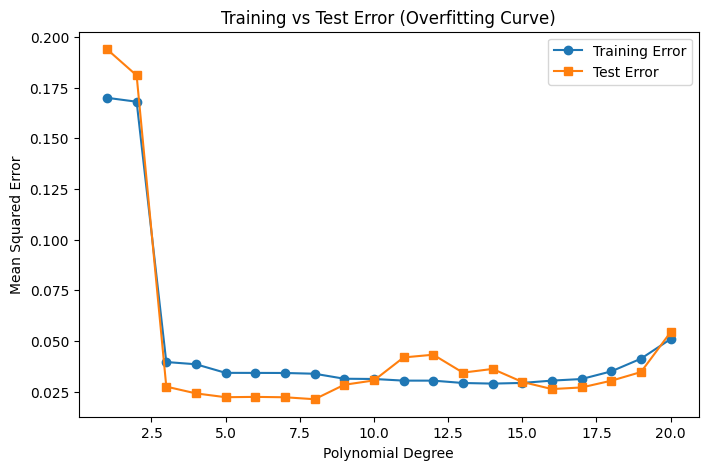

In [6]:
# Step 4: Plot Training vs Test Error for multiple degrees
max_degree = 20
train_errors = []
test_errors = []

for d in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_degree + 1), train_errors, marker='o', label="Training Error")
plt.plot(range(1, max_degree + 1), test_errors, marker='s', label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test Error (Overfitting Curve)")
plt.legend()
plt.show()
